In [16]:
import pandas as pd
data=pd.read_csv('superstore.csv',sep=',')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [18]:
# Conversion en datetime
data['Order.Date'] = pd.to_datetime(data['Order.Date'], dayfirst=True, errors='coerce')
data['Ship.Date'] = pd.to_datetime(data['Ship.Date'], dayfirst=True, errors='coerce')
print(data[['Order.Date', 'Ship.Date']].dtypes)


Order.Date    datetime64[ns]
Ship.Date     datetime64[ns]
dtype: object


In [19]:
doublons = data.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")
data = data.drop_duplicates()


Nombre de doublons : 0


In [20]:
print(data.columns.tolist())


['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2', 'weeknum']


In [21]:
data = data.drop(columns=['记录数'])
data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-07-01,CA-2011-130813,High,...,19,Consumer,2011-09-01,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,NaT,CA-2011-148614,Medium,...,19,Consumer,NaT,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-05-08,CA-2011-118962,Medium,...,21,Consumer,2011-09-08,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-05-08,CA-2011-118962,Medium,...,111,Consumer,2011-09-08,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,NaT,CA-2011-146969,High,...,6,Consumer,2011-03-10,Standard Class,1.32,California,Paper,2011,North America,40


In [22]:
# Créer une nouvelle colonne : délai d'expédition
data['Délai_Expédition'] = (data['Ship.Date'] - data['Order.Date']).dt.days

# Afficher les premières lignes pour vérification
print(data[['Order.Date', 'Ship.Date', 'Délai_Expédition']].head())


  Order.Date  Ship.Date  Délai_Expédition
0 2011-07-01 2011-09-01              62.0
1        NaT        NaT               NaN
2 2011-05-08 2011-09-08             123.0
3 2011-05-08 2011-09-08             123.0
4        NaT 2011-03-10               NaN


In [23]:
#partie 2
# Regrouper les données par région et additionner les profits
top_regions = data.groupby('Region')['Profit'].sum().sort_values(ascending=False).head(5)

# Afficher les 5 régions les plus rentables
print(top_regions)


Region
Central         311403.98164
North           194597.95252
North Asia      165578.42100
South           140355.76618
Central Asia    132480.18700
Name: Profit, dtype: float64


In [26]:
taux_retour = data.groupby('Category').apply(
    lambda x: x['Profit'].sum() / x['Sales'].sum())
print(taux_retour)


Category
Furniture          0.069378
Office Supplies    0.136897
Technology         0.139899
dtype: float64


In [31]:
#Comparer les performances de chaque Segment par pays : Un segment est une catégorie ou groupe de clients ayant des
#caractéristiques communes 
# Grouper par Country et Segment, puis additionner Sales et Profit
# Grouper par pays et segment, somme du profit
perf_segment_pays = data.groupby(['Country', 'Segment'])[['Profit']].sum().reset_index()
# Trier par profit décroissant
perf_segment_pays = perf_segment_pays.sort_values(by='Profit', ascending=False)
print(perf_segment_pays.head(10))

            Country      Segment        Profit
384   United States     Consumer  134119.20920
385   United States    Corporate   91979.13400
68            China     Consumer   76396.77900
125         Germany     Consumer   67034.49300
153           India     Consumer   66816.19500
386   United States  Home Office   60298.67850
16        Australia     Consumer   57037.16700
222          Mexico     Consumer   54960.56352
381  United Kingdom     Consumer   54855.01500
117          France     Consumer   50318.36850


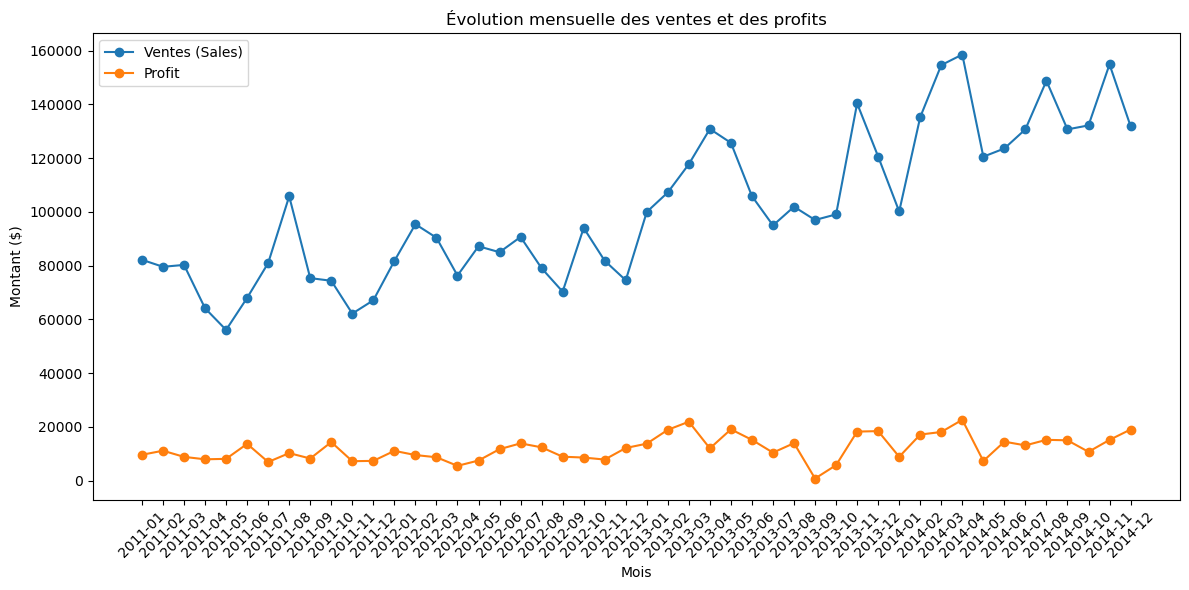

In [33]:
import matplotlib.pyplot as plt

# 2. Extraire année-mois (format YYYY-MM)
data['YearMonth'] = data['Order.Date'].dt.to_period('M')

# 3. Grouper par mois et sommer Sales et Profit
monthly_data = data.groupby('YearMonth')[['Sales', 'Profit']].sum().reset_index()

# 4. Convertir YearMonth en string pour l'affichage
monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)

# 5. Tracer le graphique multi-lignes
plt.figure(figsize=(12,6))
plt.plot(monthly_data['YearMonth'], monthly_data['Sales'], label='Ventes (Sales)', marker='o')
plt.plot(monthly_data['YearMonth'], monthly_data['Profit'], label='Profit', marker='o')

plt.title("Évolution mensuelle des ventes et des profits")
plt.xlabel("Mois")
plt.ylabel("Montant ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

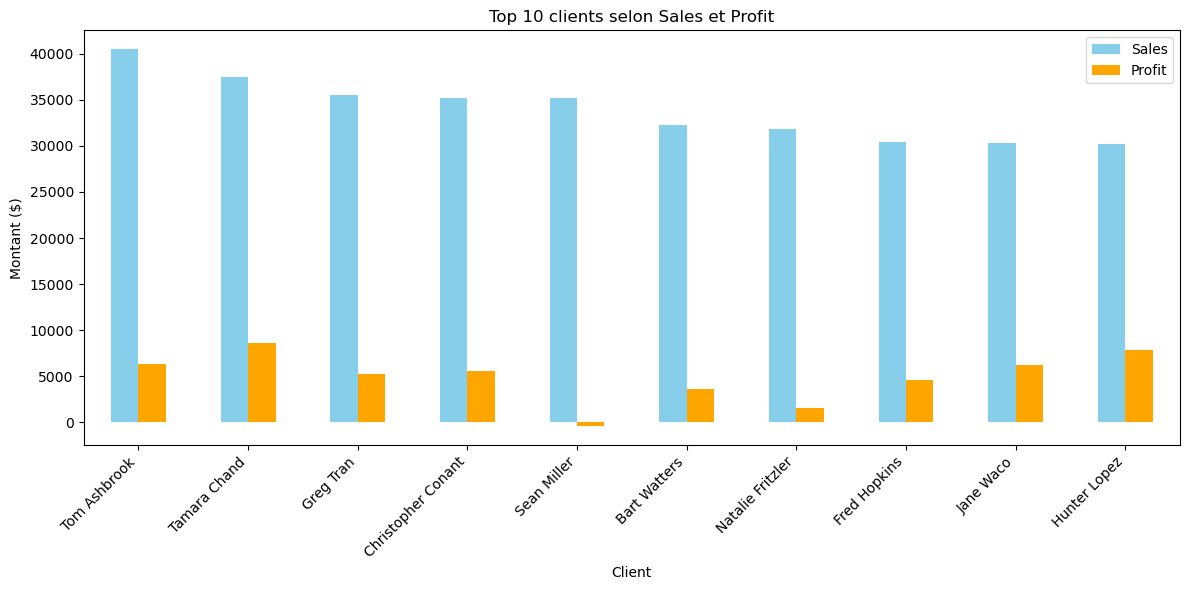

In [34]:
top_clients = data.groupby('Customer.Name')[['Sales', 'Profit']].sum()

# 3 : Trier selon Sales (ou Profit) pour prendre top 10
top_clients = top_clients.sort_values(by='Sales', ascending=False).head(10)

# 4 : Tracer un graphique multi-barres
ax = top_clients.plot(kind='bar', figsize=(12,6), color=['skyblue', 'orange'])
plt.title('Top 10 clients selon Sales et Profit')
plt.ylabel('Montant ($)')
plt.xlabel('Client')
plt.xticks(rotation=45, ha='right')
plt.legend(['Sales', 'Profit'])
plt.tight_layout()
plt.show()

Délai moyen de livraison par région :
            Region  Délai_Livraison
0           Africa       106.969072
1           Canada        97.099099
2        Caribbean       102.401891
3          Central       110.859897
4     Central Asia       114.256048
5             EMEA       108.038517
6             East       108.007772
7            North       113.827303
8       North Asia       106.196899
9          Oceania       109.961283
10           South       105.907461
11  Southeast Asia       111.789744
12            West       105.222938


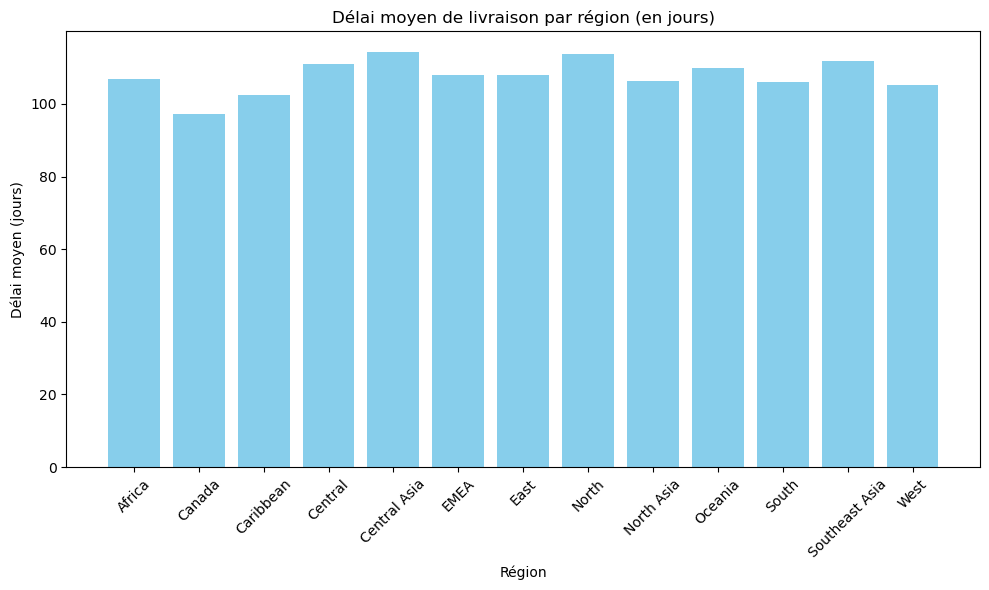

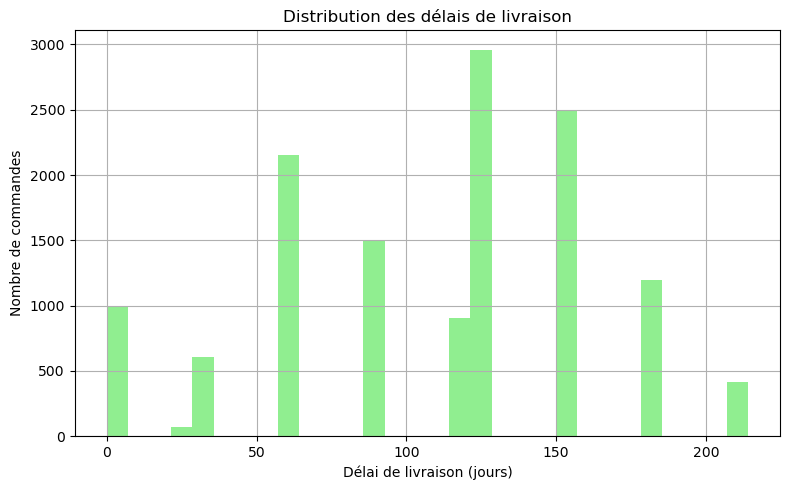

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Conversion des colonnes en datetime
data['Order.Date'] = pd.to_datetime(data['Order.Date'], dayfirst=True, errors='coerce')
data['Ship.Date'] = pd.to_datetime(data['Ship.Date'], dayfirst=True, errors='coerce')

# 2. Calcul du délai de livraison en jours
data['Délai_Livraison'] = (data['Ship.Date'] - data['Order.Date']).dt.days

# 3. Suppression des lignes avec délais négatifs ou valeurs manquantes (optionnel)
data = data[data['Délai_Livraison'] >= 0]
data = data.dropna(subset=['Délai_Livraison', 'Region'])

# 4. Calcul du délai moyen par région
delai_moyen_region = data.groupby('Region')['Délai_Livraison'].mean().reset_index()

print("Délai moyen de livraison par région :")
print(delai_moyen_region)

# 5. Visualisation du délai moyen par région
plt.figure(figsize=(10,6))
plt.bar(delai_moyen_region['Region'], delai_moyen_region['Délai_Livraison'], color='skyblue')
plt.title('Délai moyen de livraison par région (en jours)')
plt.xlabel('Région')
plt.ylabel('Délai moyen (jours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Distribution générale des délais de livraison
plt.figure(figsize=(8,5))
data['Délai_Livraison'].hist(bins=30, color='lightgreen')
plt.title('Distribution des délais de livraison')
plt.xlabel('Délai de livraison (jours)')
plt.ylabel('Nombre de commandes')
plt.tight_layout()
plt.show()
